<a href="https://colab.research.google.com/github/oluwatobi16/Machine-Learning/blob/main/Zpvb45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
#Loading the dataset
# Load the mushroom dataset into pandas DataFrame
url = "https://archive.ics.uci.edu/static/public/73/data.csv"
df = pd.read_csv(url)

# Selected features and target variable
selected_features = ['cap-color', 'cap-shape', 'gill-color', 'veil-color', 'habitat', 'population', 'poisonous']

# Keep only the selected features and target variable
df = df[selected_features]

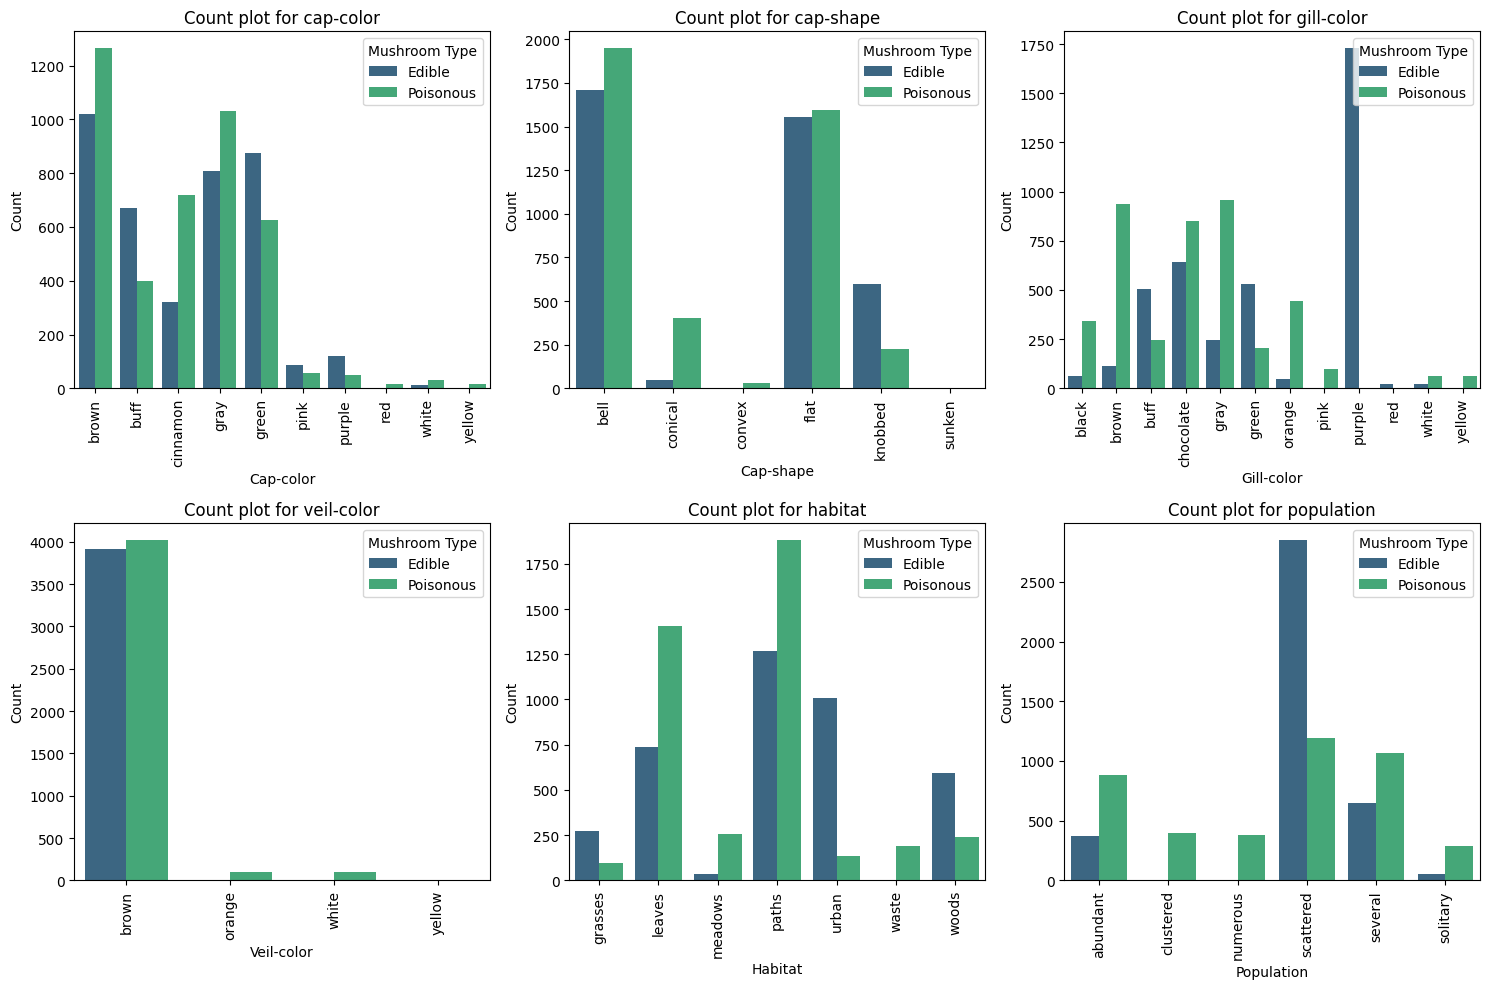

In [119]:
#Data visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Key dictionaries
key_dict = {
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
                  'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red',
                  'w': 'white', 'y': 'yellow'},

    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex',
                  'f': 'flat', 'k': 'knobbed', 's': 'sunken'},

    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
                   'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink',
                   'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},

    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},

    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows',
                'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'},

    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous',
                   's': 'scattered', 'v': 'several', 'y': 'solitary'}
}

# Select the specified features
selected_features = ['cap-color', 'cap-shape', 'gill-color', 'veil-color', 'habitat', 'population']

# Set up a color palette for 'poisonous' and 'edible'
colors = sns.color_palette('viridis', 2)

# Set up a grid layout for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Count plots for categorical features
for i, feature in enumerate(selected_features):
    row, col = divmod(i, 3)
    sns.countplot(x=feature, hue='poisonous', data=df, palette=colors, ax=axes[row, col])
    axes[row, col].set_title(f'Count plot for {feature}')
    axes[row, col].set_xlabel(feature.capitalize())
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Mushroom Type', labels=['Edible', 'Poisonous'], loc='upper right')

    # Replace x-axis labels with key values and rotate them
    ticks = range(len(key_dict[feature]))
    labels = list(key_dict[feature].values())
    axes[row, col].set_xticks(ticks)
    axes[row, col].set_xticklabels(labels, rotation=90)  # Rotate labels 90 degrees

# Adjust layout
plt.tight_layout()
plt.show()


In [122]:
#Snippet prints data splits as I was having errors regarding them, so just needed a check

# Display the count of edible and poisonous mushrooms
count_by_class = df['poisonous'].value_counts()

print("Edible Mushrooms:", count_by_class[0])
print("Poisonous Mushrooms:", count_by_class[1])

# Keep only the selected features and target variable
df = df[selected_features]

# Separate features and target variable
X = df.drop('poisonous', axis=1)
y = df['poisonous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)

Edible Mushrooms: 4208
Poisonous Mushrooms: 3916
     cap-color cap-shape gill-color veil-color habitat population
7873         e         k          b          w       d          v
6515         n         x          b          w       p          v
6141         e         f          b          w       l          v
2764         n         f          u          w       d          v
438          y         b          k          w       m          n
...        ...       ...        ...        ...     ...        ...
5226         n         x          b          w       p          v
5390         e         k          w          w       w          c
860          n         f          w          w       p          y
7603         e         k          b          w       p          v
7270         g         k          g          w       g          n

[6499 rows x 6 columns]
     cap-color cap-shape gill-color veil-color habitat population
1971         n         f          h          w       g          s
66

Accuracy: 0.9003

Classification Report:
              precision    recall  f1-score   support

           e       0.90      0.91      0.90       843
           p       0.90      0.90      0.90       782

    accuracy                           0.90      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg       0.90      0.90      0.90      1625



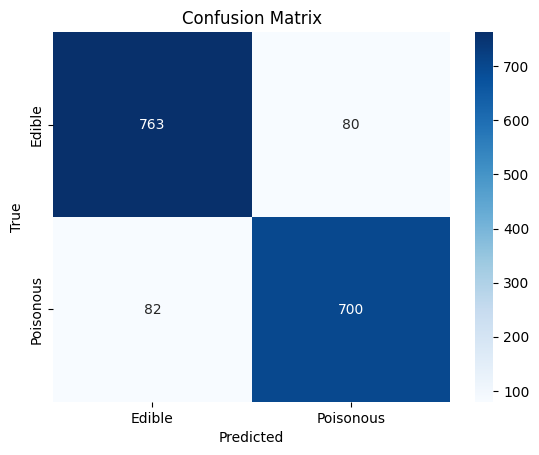

In [123]:
#Initial logistic regression model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features
categorical_features = ['cap-color', 'cap-shape', 'gill-color', 'veil-color', 'habitat', 'population']
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model with increased max_iter
classifier = LogisticRegression(random_state=42, max_iter=1000)
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}\n")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Best Hyperparameters:
{'C': 100, 'penalty': 'l2'}
Accuracy: 0.9040

Classification Report:
              precision    recall  f1-score   support

           e       0.91      0.91      0.91       843
           p       0.90      0.90      0.90       782

    accuracy                           0.90      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg       0.90      0.90      0.90      1625



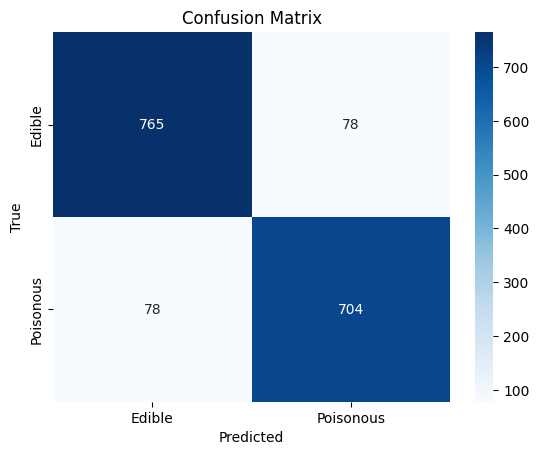

In [124]:
#Logistic regression model with hyperparameter tuning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features
categorical_features = ['cap-color', 'cap-shape', 'gill-color', 'veil-color', 'habitat', 'population']
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])


# Define the hyperparameters grid (including C and penalty)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l2']}

# Initialize Logistic Regression model
classifier = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

# Perform grid search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)


# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}\n")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Create confusion matrix for the best model
cm = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       843
           1       0.94      0.93      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

Accuracy: 0.9397



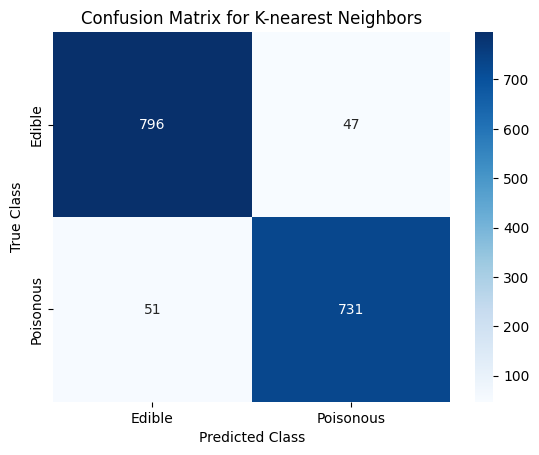

In [129]:
#Initial model for K-nearest neighbours
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the mushroom dataset into a pandas DataFrame
url = "https://archive.ics.uci.edu/static/public/73/data.csv"
df = pd.read_csv(url)

# Selected features
selected_features = ['cap-color', 'cap-shape', 'gill-color', 'veil-color', 'habitat', 'population', 'poisonous']

# Keep only the selected features
df = df[selected_features]

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df[categorical_features])

# Convert string labels to numerical format
label_mapping = {'e': 0, 'p': 1}
df['poisonous'] = df['poisonous'].map(label_mapping)

# Split the data into features (X) and target variable (y)
X = X_encoded
y = df['poisonous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize K-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Evaluate the best model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}\n")

# Visualize the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix for K-nearest Neighbors")
plt.show()


Best Hyperparameters: {'n_neighbors': 7}
Accuracy: 0.9415

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       843
           1       0.96      0.92      0.94       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



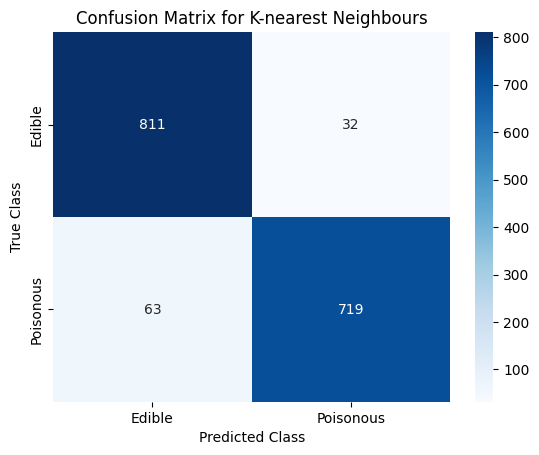

In [127]:
#k-nearest neighbours model with hyperparameter tuning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the mushroom dataset into a pandas DataFrame
url = "https://archive.ics.uci.edu/static/public/73/data.csv"
df = pd.read_csv(url)

# Selected features
selected_features = ['cap-color', 'cap-shape', 'gill-color', 'veil-color', 'habitat', 'population', 'poisonous']

# Keep only the selected features
df = df[selected_features]

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df[categorical_features])

# Convert string labels to numerical format
label_mapping = {'e': 0, 'p': 1}
df['poisonous'] = df['poisonous'].map(label_mapping)

# Split the data into features (X) and target variable (y)
X = X_encoded
y = df['poisonous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {'n_neighbors': range(1, 21)}  # You can adjust the range of k

# Initialize K-nearest neighbors model
knn = KNeighborsClassifier()

# Initialize grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions on the test set using the best model
predictions = best_knn.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}\n")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix for K-nearest Neighbours")
plt.show()
